This notebook contains plots of various statistical and systems metrics gathered from the last run

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import visualization_utils

In [11]:
SHOW_WEIGHTED = True # show weighted accuracy instead of unweighted accuracy
PLOT_CLIENTS = False
stat_file = 'stat_metrics.csv' # change to None if desired
sys_file = 'sys_metrics.csv' # change to None if desired

stat_metrics, sys_metrics = visualization_utils.load_data(stat_file, sys_file)

/media/data/data_entry/pengj/leaf/models/metrics/visualization_utils.py:82: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  percentile_10 = stat_metrics.groupby(NUM_ROUND_KEY, as_index=False).quantile(0.1)
/media/data/data_entry/pengj/leaf/models/metrics/visualization_utils.py:83: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  percentile_90 = stat_metrics.groupby(NUM_ROUND_KEY, as_index=False).quantile(0.9)


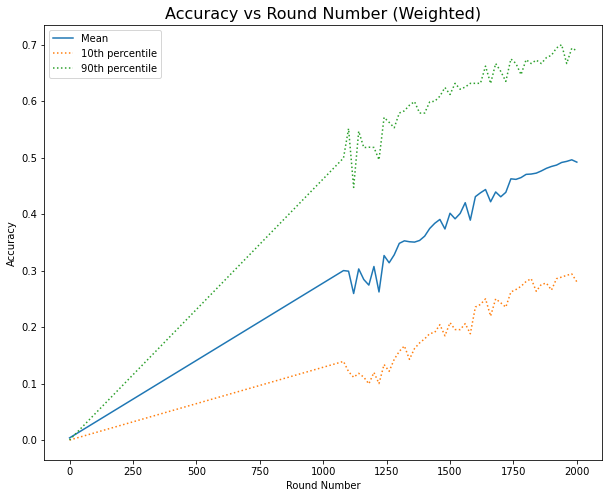

In [12]:
# Plots accuracy vs. round number.
if stat_metrics is not None:
    visualization_utils.plot_accuracy_vs_round_number(stat_metrics, True, plot_stds=False)

In [13]:
if PLOT_CLIENTS and stat_metrics is not None:
    visualization_utils.plot_accuracy_vs_round_number_per_client(stat_metrics, sys_metrics, max_num_clients=20)

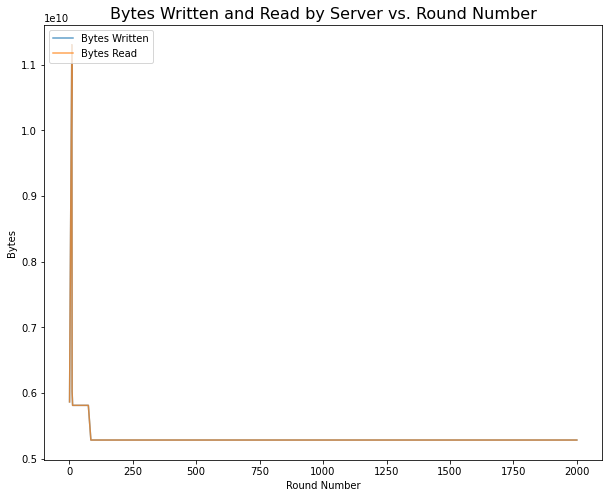

In [14]:
# Plots the cumulative sum of the bytes written and read by the server in 
# the past rolling_window rounds versus the round number

if stat_metrics is not None:
    visualization_utils.plot_bytes_written_and_read(sys_metrics, rolling_window=10)

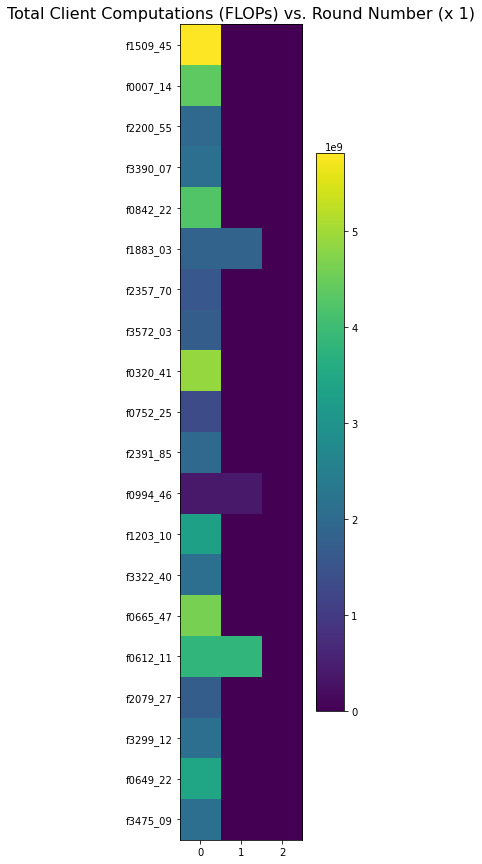

In [15]:
visualization_utils.plot_client_computations_vs_round_number(sys_metrics, aggregate_window=1, max_num_clients=20, range_rounds=(1, 4))

In [16]:
print('Longest FLOPs path: %s' % visualization_utils.get_longest_flops_path(sys_metrics))

Longest FLOPs path: 9.48E+12
